In [25]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decay rate calibration


In [26]:
path_mac = '../../data_mac/data_17_july_2024_bw8_BU/'
path_me = '../../data_me/data_8_jupy_2024/'

paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.30_3_ar0.0_g0.000_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv1.0_tmax25_TRSM3"
dyn_cav1_250 = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.30_3_ar0.0_g0.000_al0.050405_nm1000_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv1.0_tmax25_TRSM3"
dyn_cav1_1000 = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.30_3_ar0.0_g0.000_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv1.0_tmax50_TRSM3"
dyn_cav1_250_LONG = da.dynamics(2, path_mac, paramchar)

dyns={}
paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.30_3_ar0.0_g0.250_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0500_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv0.0_tmax25_TRSM3"
dyns["n=1"] = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n2_2_E0.10E+00_dtadd0.20_0.30_3_ar0.0_g0.250_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0500_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv0.0_tmax25_TRSM3"
dyns["n=2"] = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n2_10_E0.30E-01_dtadd0.20_0.30_3_ar0.0_g0.250_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0500_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv0.0_tmax25_TRSM3"
dyns["n=10"] = da.dynamics(2, path_mac, paramchar)
paramchar= "nl2_n2_30_E0.40E-01_dtadd0.20_0.30_3_ar0.0_g0.250_al0.050405_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw8.000F_mr0.00_0.00_0.00_wd7.500_ad0.0500_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv0.0_tmax25_TRSM3"
dyns["n=30"] = da.dynamics(2, path_mac, paramchar)

paramchar_me= "tmax30_Nq2_Nc10_amp0.0500_kappa0.1000_wq5.3037_anh15.7563_wc7.5000_g0.2500_wd7.5000_ms1e-02_dimexp20_qb[1,'B']_11_TRSM3.txt"
times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
a_p_adag_me = np.loadtxt(path_me+"A_P_ADAG_"+paramchar_me)
pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)

Gamma=0.1*2*np.pi

-- fitted decay rate/(2*np.pi) = 0.09999784584752576 GHz


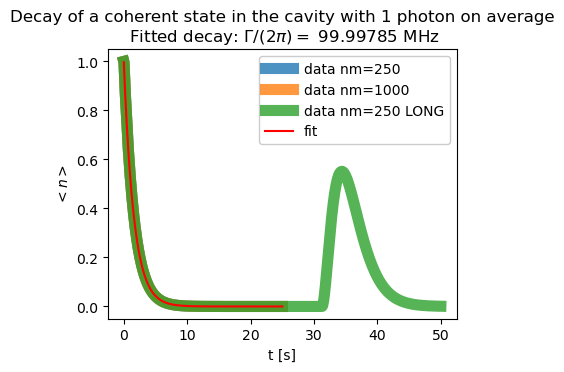

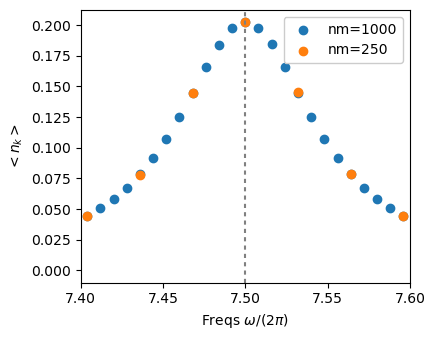

In [27]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1_1000.times, dyn_cav1_1000.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1_250.times[1:], dyn_cav1_250.nk[1:,0], linewidth=8, alpha=0.8,label='data nm=250'  )
plt.plot( dyn_cav1_1000.times[1:], dyn_cav1_1000.nk[1:,0], linewidth=8, alpha=0.8,label='data nm=1000'  )
plt.plot( dyn_cav1_250_LONG.times[1:], dyn_cav1_250_LONG.nk[1:,0], linewidth=8, alpha=0.8,label='data nm=250 LONG'  )
plt.plot( dyn_cav1_1000.times[1:], exp_decay( dyn_cav1_1000.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()
plt.show()

plt.scatter( dyn_cav1_1000.wk[:]/(2*np.pi), dyn_cav1_1000.nk[-1,1:]*4, label='nm=1000'  )
plt.scatter( dyn_cav1_250.wk[:]/(2*np.pi), dyn_cav1_250.nk[-1,1:], label='nm=250'  )
plt.axvline( 7.50 ,c='gray', dashes=[2,2,2,2] )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.xlim(7.4,7.6)
#plt.ylim(0.029,0.0325)
plt.legend()
plt.tight_layout()

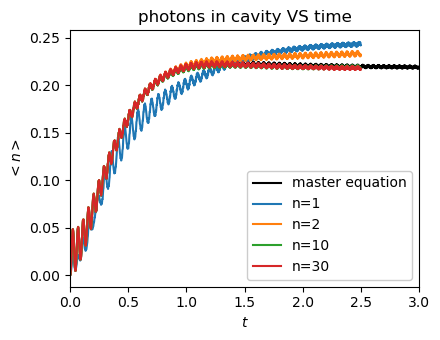

In [28]:
plt.plot( (Gamma/(2*np.pi))*times_me, photons_me, label='master equation',c='black'  )  
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].nk[:,0], label=key  )  
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,3)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

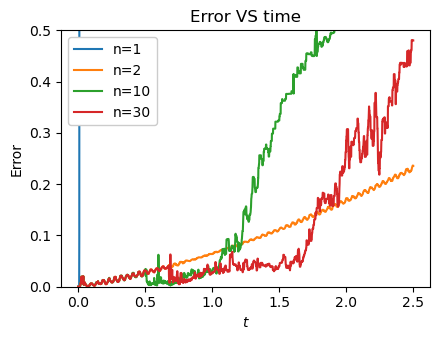

In [29]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].error, label=key  )  
plt.ylabel( "Error" )
plt.xlabel( "$t$" )
plt.title( "Error VS time"  )
plt.legend()
plt.tight_layout()
plt.ylim(0,0.5)
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

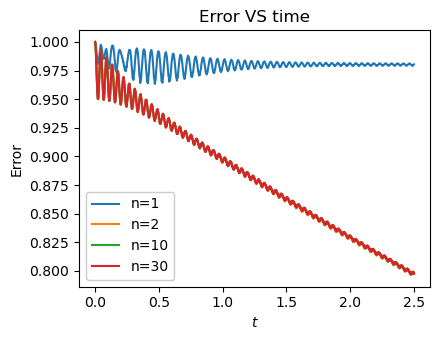

In [35]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].pplt[:,1], label=key  )  
plt.ylabel( "Error" )
plt.xlabel( "$t$" )
plt.title( "Error VS time"  )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

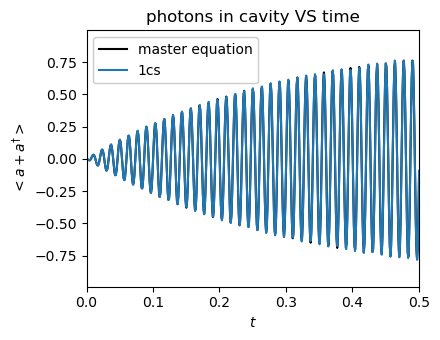

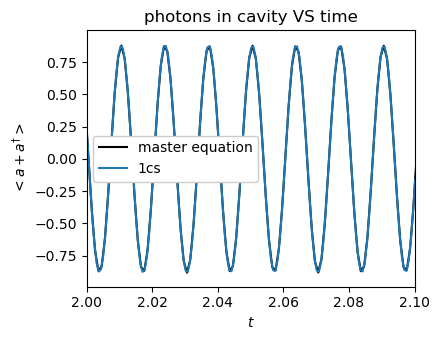

In [14]:
plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black'  )  
plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].apadag, label='1cs'  )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,0.5)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black'  )  
plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].apadag, label='1cs'  )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(2,2.1)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()